# Libs and Paths

In [ ]:
import os
os.chdir("/Users/finlayduff/Documents/BATH MSc/Dissertation")

In [50]:
from utils.data.results import load_combined_results

In [84]:
dataset_name = "FA-KES_None"
# experiment_id = "b7daf879-2120-4941-93bb-8533b910d1df"
# experiment_id = "eb741518-88e7-4245-b76b-8864e8cd9e18"
experiment_id = "29d549fe-24f8-4506-a960-48b2b9868540"

# dataset_name = "recovery-news-data_100"
# experiment_id = "6277d39b-d2f6-4944-a953-fde69e80ef43"


In [85]:
df = load_combined_results(dataset_name=dataset_name, experiment_id=experiment_id)

In [86]:
df.prediction.value_counts()

prediction
0    527
1    273
Name: count, dtype: int64

## 1. Accuracy

In [87]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(df["actual"], df["prediction"])
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.506


## ✅ 2. Precision, Recall, F1 Score

In [88]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(df["actual"], df["prediction"])
recall = recall_score(df["actual"], df["prediction"])
f1 = f1_score(df["actual"], df["prediction"])

print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 Score:  {f1:.3f}")

Precision: 0.553
Recall:    0.356
F1 Score:  0.433


## ✅ 3. Confusion Matrix


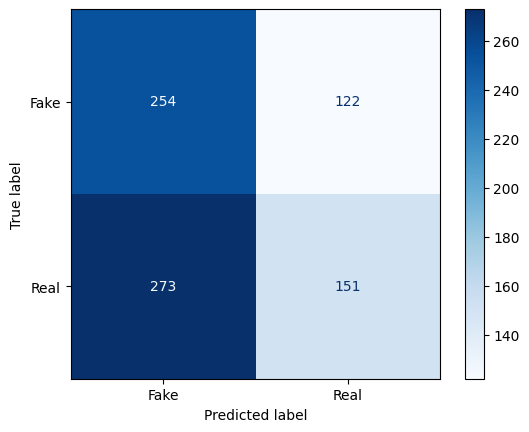

In [89]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(df["actual"], df["prediction"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake", "Real"])
disp.plot(cmap="Blues")

## ✅ 4. ROC-AUC Score 

In [90]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(df["actual"], df["confidence"])
print(f"ROC-AUC Score: {roc_auc:.3f}")

ROC-AUC Score: 0.504


# Classification Report

In [91]:
from sklearn.metrics import classification_report
print(classification_report(df["actual"], df["prediction"], target_names=["Real", "Fake"]))

              precision    recall  f1-score   support

        Real       0.48      0.68      0.56       376
        Fake       0.55      0.36      0.43       424

    accuracy                           0.51       800
   macro avg       0.52      0.52      0.50       800
weighted avg       0.52      0.51      0.49       800

